# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

In [147]:
#!pip install tensorflow

In [148]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.4.1


## Домашнее задание

  1. Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу.  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [149]:
from sklearn.datasets import load_boston

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm

In [151]:
df = load_boston()

In [152]:
type(df)

sklearn.utils.Bunch

In [153]:
dataset = pd.DataFrame(df.data)

In [154]:
dataset.columns = df.feature_names

In [155]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [156]:
dataset.shape

(506, 13)

In [157]:
X, y = load_boston(return_X_y=True)

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.python.client import device_lib
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [160]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dense(32, activation='linear'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='MSE',
              metrics=['MAE'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [161]:
history = model.fit(X, y,
                    epochs=10,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

Epoch 1/10
10/10 - 1s - loss: 3945.9688 - MAE: 49.6715 - val_loss: 3115.5273 - val_MAE: 55.4945
Epoch 2/10
10/10 - 0s - loss: 1256.6134 - MAE: 29.3166 - val_loss: 211.6440 - val_MAE: 12.7469
Epoch 3/10
10/10 - 0s - loss: 454.6855 - MAE: 18.2843 - val_loss: 71.9390 - val_MAE: 7.1547
Epoch 4/10
10/10 - 0s - loss: 161.6205 - MAE: 10.0037 - val_loss: 168.9094 - val_MAE: 11.2963
Epoch 5/10
10/10 - 0s - loss: 115.6646 - MAE: 8.3243 - val_loss: 73.2043 - val_MAE: 7.3322
Epoch 6/10
10/10 - 0s - loss: 96.2724 - MAE: 7.2804 - val_loss: 43.1241 - val_MAE: 5.0328
Epoch 7/10
10/10 - 0s - loss: 84.2351 - MAE: 7.0944 - val_loss: 37.0966 - val_MAE: 4.9298
Epoch 8/10
10/10 - 0s - loss: 79.2110 - MAE: 6.5202 - val_loss: 31.6636 - val_MAE: 4.8712
Epoch 9/10
10/10 - 0s - loss: 73.9104 - MAE: 6.3738 - val_loss: 34.0416 - val_MAE: 4.8297
Epoch 10/10
10/10 - 0s - loss: 71.9869 - MAE: 6.1596 - val_loss: 30.6657 - val_MAE: 4.7506


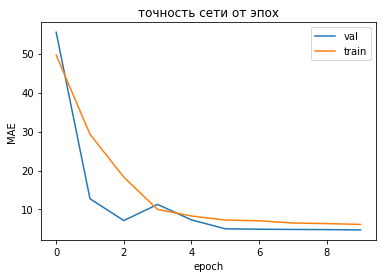

In [162]:
plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.title('точность сети от эпох')
plt.show()

In [163]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [164]:
inputs = Input(shape=(13))
x_1 = Dense(26, activation='relu')(inputs)
x_2 = Dense(26, activation='relu')(x_1)
x_2 = Dense(26, activation='relu')(x_1)
outputs = Dense(1)(x_2)

x_1, x_2, outputs

model = Model(inputs, outputs)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_45 (Dense)             (None, 26)                364       
_________________________________________________________________
dense_47 (Dense)             (None, 26)                702       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 27        
Total params: 1,093
Trainable params: 1,093
Non-trainable params: 0
_________________________________________________________________


In [165]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD

model.compile(optimizer=Adam(),
              loss="mse",
              metrics=["mae"])

In [166]:
def norm(x):
  mean = x.mean(axis=0)
  std = x.std(axis=0)
  return (x - mean) / std

In [167]:
X_train = norm(X_train)
X_test = norm(X_test)

Передача данных в модель

In [168]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    batch_size=256,
                    validation_split=0.2, 
                    verbose=2)

Epoch 1/10
2/2 - 1s - loss: 568.2493 - mae: 22.0134 - val_loss: 535.7701 - val_mae: 21.4052
Epoch 2/10
2/2 - 0s - loss: 564.3208 - mae: 21.9258 - val_loss: 532.1331 - val_mae: 21.3221
Epoch 3/10
2/2 - 0s - loss: 560.4689 - mae: 21.8381 - val_loss: 528.4523 - val_mae: 21.2377
Epoch 4/10
2/2 - 0s - loss: 556.5625 - mae: 21.7504 - val_loss: 524.7082 - val_mae: 21.1518
Epoch 5/10
2/2 - 0s - loss: 552.6378 - mae: 21.6601 - val_loss: 520.8901 - val_mae: 21.0639
Epoch 6/10
2/2 - 0s - loss: 548.6189 - mae: 21.5685 - val_loss: 517.0093 - val_mae: 20.9740
Epoch 7/10
2/2 - 0s - loss: 544.5217 - mae: 21.4741 - val_loss: 513.0753 - val_mae: 20.8823
Epoch 8/10
2/2 - 0s - loss: 540.4243 - mae: 21.3777 - val_loss: 509.0585 - val_mae: 20.7882
Epoch 9/10
2/2 - 0s - loss: 536.2047 - mae: 21.2794 - val_loss: 504.9966 - val_mae: 20.6917
Epoch 10/10
2/2 - 0s - loss: 531.8720 - mae: 21.1781 - val_loss: 500.8444 - val_mae: 20.5921


In [169]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest mse:', test_acc)

5/5 - 0s - loss: 542.7404 - mae: 21.3582

Test mse: 21.358200073242188


In [170]:
model.predict(X_test[:1])

array([[1.3011569]], dtype=float32)